In [1]:
import pandas as pd
from sklearn import preprocessing
from mlxtend.classifier import StackingCVClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import numpy as np
from xgboost import XGBClassifier
import warnings
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.metrics import log_loss, make_scorer

import statsmodels.api as sm

from sklearn.metrics import confusion_matrix,roc_auc_score,recall_score,precision_score,accuracy_score,f1_score
warnings.filterwarnings("ignore")



In [13]:
train_data = pd.read_csv('traindata.csv')
test_data = pd.read_csv('testdata.csv')

In [14]:
test_data.head()

,Unnamed: 0,device_id,gender,event_avg,latitude_difference,longitude_difference,latitude_medium,longitude_medium,cluster_label,is_installed,...,phone_brand_Gionee.1,phone_brand_Huawei.1,phone_brand_Meizu.1,phone_brand_OPPO.1,phone_brand_Xiaomi.1,phone_brand_lenovo.1,phone_brand_other.1,phone_brand_samsung.1,phone_brand_vivo.1,train_test_flag
0,115305,8231243155939480000,F,0.284345,32.14,118.80,32.09,118.75,-1,1,...,0,1,0,0,0,0,0,0,0,test
1,115306,8231243155939480000,F,0.293930,0.01,0.02,32.09,118.75,-1,1,...,0,1,0,0,0,0,0,0,0,test
2,115307,8231243155939480000,F,0.086262,32.09,118.77,32.09,118.75,-1,1,...,0,1,0,0,0,0,0,0,0,test
3,115308,8231243155939480000,F,0.115016,32.09,118.75,32.09,118.75,-1,1,...,0,1,0,0,0,0,0,0,0,test
4,115309,8231243155939480000,F,0.284345,32.14,118.80,32.09,118.75,-1,1,...,0,1,0,0,0,0,0,0,0,test


In [15]:
train_data.drop(['Unnamed: 0','category'],axis = 1,inplace=True)
test_data.drop(['Unnamed: 0','category'],axis = 1,inplace=True)


In [16]:
def age_group(age):
    if age == '0-24':
        return 0
    elif age == '25-32':
        return 1
    elif age == '33-45':
        return 2
    else:
        return 3

In [17]:
train_data['age_group'] = train_data['age_group'].apply(lambda x : age_group(x) )
test_data['age_group'] = test_data['age_group'].apply(lambda x: age_group(x))
train_data['gender'] = train_data['gender'].apply(lambda x: 0 if x == 'M' else 1)
test_data['gender'] = test_data['gender'].apply(lambda x: 0 if x=='M' else 1)

In [18]:
age_train = train_data['age_group'].values
gender_train = train_data['gender'].values
age_test = test_data['age_group'].values
gender_test = test_data['gender'].values
X_train = train_data.drop(['device_id','gender','train_test_flag','age_group'],axis = 1)
X_test = test_data.drop(['device_id','gender','train_test_flag','age_group'],axis = 1)

In [19]:
X_test

,event_avg,latitude_difference,longitude_difference,latitude_medium,longitude_medium,cluster_label,is_installed,is_active,phone_brand_Coolpad,phone_brand_Gionee,...,phone_brand_Coolpad.1,phone_brand_Gionee.1,phone_brand_Huawei.1,phone_brand_Meizu.1,phone_brand_OPPO.1,phone_brand_Xiaomi.1,phone_brand_lenovo.1,phone_brand_other.1,phone_brand_samsung.1,phone_brand_vivo.1
0,0.284345,32.14,118.80,32.09,118.75,-1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.293930,0.01,0.02,32.09,118.75,-1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.086262,32.09,118.77,32.09,118.75,-1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.115016,32.09,118.75,32.09,118.75,-1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.284345,32.14,118.80,32.09,118.75,-1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134716,1.000000,0.00,0.00,40.07,116.44,63,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
134717,1.000000,0.00,0.00,0.00,0.00,-1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
134718,1.000000,0.00,0.00,0.00,0.00,-1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
134719,0.333333,0.00,0.00,0.00,0.00,-1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### 1. LogisticRegression (Started with simple model)

LogisticRegression on Test data 
0.5865900639098581
[[52459 40416]
 [15279 26567]]
Recall 0.6348754958657936
F1-Score 0.48823383473155135
Preicsion 0.39662302375229536


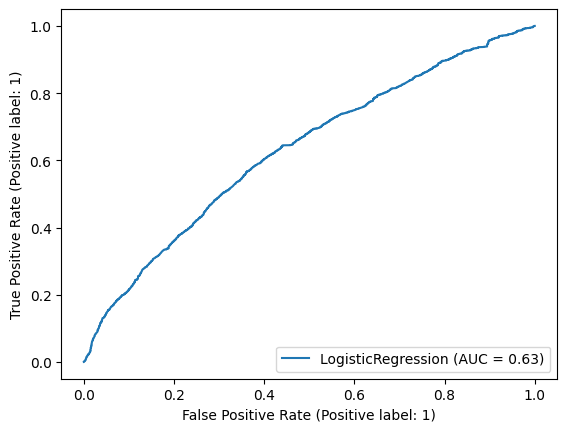

LogisticRegression on Training  data 
0.5728134863131985
[[157236 125700]
 [ 46463  73617]]
Recall 0.6130662891405729
F1-Score 0.46097489957638926
Preicsion 0.36934631767485965


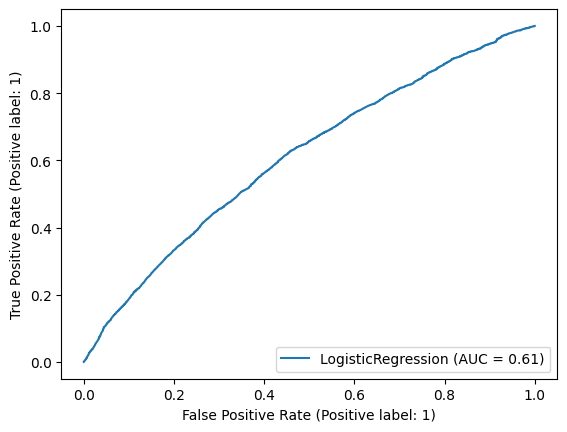

In [93]:
# diclare the logistic model
model = LogisticRegression(class_weight= 'balanced')
# train the model on the data
model.fit(X_train, gender_train)
y_pred = model.predict(X_test)
print("LogisticRegression on Test data ")
print(accuracy_score(gender_test, y_pred))
# Plot and print confusion matrix
cnf_matrix = confusion_matrix(gender_test, y_pred)
print(cnf_matrix)
print('Recall',recall_score(gender_test, y_pred))
print('F1-Score',f1_score(gender_test, y_pred))
print('Preicsion',precision_score(gender_test, y_pred))
roc_auc_score(gender_test, model.predict_proba(X_test)[:, 1])
RocCurveDisplay.from_estimator(model, X_test, gender_test) 
plt.show()

print("LogisticRegression on Training  data ")
y_pred = model.predict(X_train)

print(accuracy_score(gender_train, y_pred))
# Plot and print confusion matrix
cnf_matrix = confusion_matrix(gender_train, y_pred)
print(cnf_matrix)
print('Recall',recall_score(gender_train, y_pred))
print('F1-Score',f1_score(gender_train, y_pred))
print('Preicsion',precision_score(gender_train, y_pred))
roc_auc_score(gender_train, model.predict_proba(X_train)[:, 1])
RocCurveDisplay.from_estimator(model, X_train, gender_train) 
plt.show()

### Logistic Regression not overfitting but still scope for improve the Accuracy 

In [96]:
def sm_model_evaluation (model, x_test, y_test, columns):
    '''
    model = sm model
    y_test = series of labels 
    columns = list of columns in features
    x_test = test dataframe 
    '''
    X_sm = sm.add_constant(x_test[columns])
    y_pred = res.predict(X_sm)
    y_train_pred_final = pd.DataFrame({'y':y_test, 'y_Prob':y_pred})
    y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
    # Let's check the overall accuracy.
    print(accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))
    confusion = confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
    print(confusion)
    

In [100]:
model = LogisticRegression(class_weight= 'balanced')
for i in range(10, 25):
    rfe = RFE(estimator=model, n_features_to_select=i)           # running RFE with 25 variable output.
    rfe = rfe.fit(X_train, gender_train)
    col = X_train.columns[rfe.support_]
    X_train_sm = sm.add_constant(X_train[col])
    logm2 = sm.GLM(gender_train,X_train_sm, family = sm.families.Binomial())
    res = logm2.fit()
    print ("=====================================================")
    print (i)
    sm_model_evaluation (res, X_test, gender_test, col)

10
0.6893876975378745
[[92875     0]
 [41846     0]]
11
0.6893876975378745
[[92875     0]
 [41846     0]]
12
0.6893876975378745
[[92875     0]
 [41846     0]]
13
0.6893876975378745
[[92875     0]
 [41846     0]]
14
0.6893876975378745
[[92875     0]
 [41846     0]]
15
0.6893876975378745
[[92875     0]
 [41846     0]]
16
0.6893876975378745
[[92875     0]
 [41846     0]]
17
0.6893876975378745
[[92875     0]
 [41846     0]]
18
0.6893876975378745
[[92875     0]
 [41846     0]]
19
0.6893876975378745
[[92875     0]
 [41846     0]]
20
0.6893876975378745
[[92875     0]
 [41846     0]]
21
0.6893876975378745
[[92875     0]
 [41846     0]]
22
0.6893876975378745
[[92875     0]
 [41846     0]]
23
0.6891130558710223
[[92829    46]
 [41837     9]]
24
0.6890982103755168
[[92827    48]
 [41837     9]]


### Try to use  Different Algorthim like Ensemble Methods to increase 

RandomForest  on Test Dataset
Accuracy: 0.6352981346634897
Recall: 0.3732387015969105
Precision: 0.25636858959040293
f1 Score: 0.30395670713567274


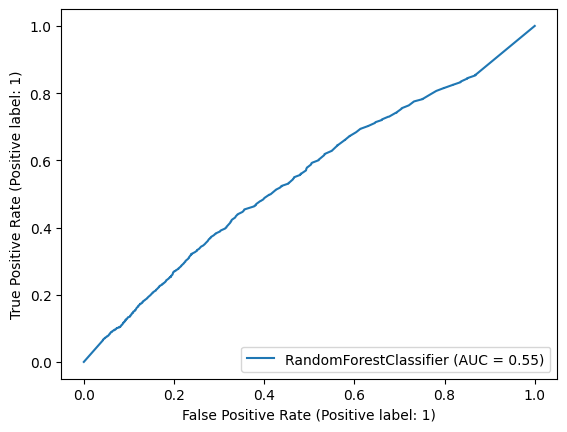

RandomForest on Training Dataset
Accuracy: 0.9136634773805506
Recall: 0.900613473878038
Precision: 0.7983344437041971
f1 Score: 0.8463952887786229


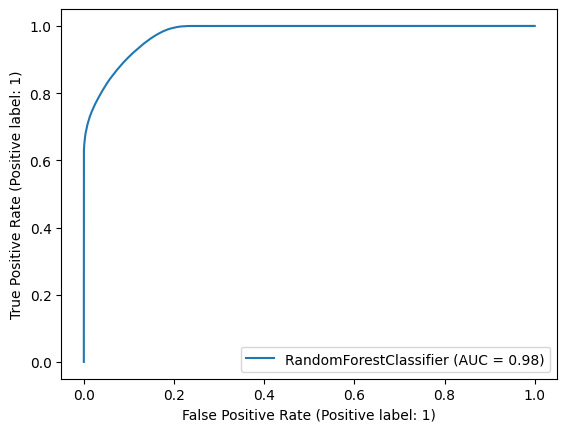

In [20]:
clf = RandomForestClassifier()
print("RandomForest  on Test Dataset")

clf.fit(X_train,gender_train)
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_pred,gender_test))
print("Recall:",recall_score(y_pred,gender_test))
print("Precision:",precision_score(y_pred,gender_test))
print("f1 Score:",f1_score(y_pred,gender_test))
roc_auc_score(gender_test, clf.predict_proba(X_test)[:, 1])
RocCurveDisplay.from_estimator(clf, X_test, gender_test) 
plt.show()

print("RandomForest on Training Dataset")
y_pred = clf.predict(X_train)
print("Accuracy:",accuracy_score(y_pred,gender_train))
print("Recall:",recall_score(y_pred,gender_train))
print("Precision:",precision_score(y_pred,gender_train))
print("f1 Score:",f1_score(y_pred,gender_train))
roc_auc_score(gender_train, clf.predict_proba(X_train)[:, 1])
RocCurveDisplay.from_estimator(clf, X_train, gender_train) 
plt.show()

### Try Hypertuning on the Random Forest Model

Random Forest Tree on Test Dataset
Accuracy: 0.6397295150718894
Recall: 0.38273855430133913
Precision: 0.2609090474597333
f1 Score: 0.3102938668788723


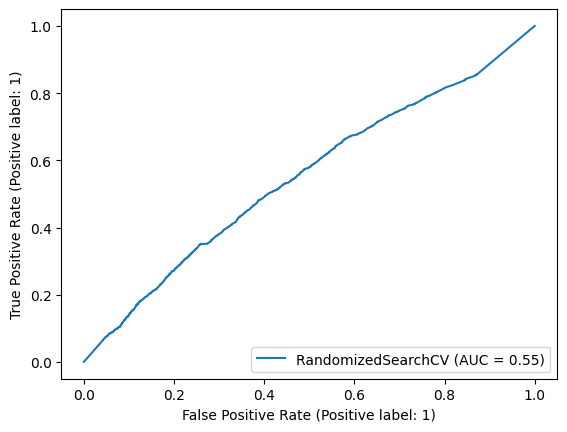

Random Forest Tree on Training Dataset
Accuracy: 0.9133409095420529
Recall: 0.9017844504628625
Precision: 0.795827781479014
f1 Score: 0.8454994669344528


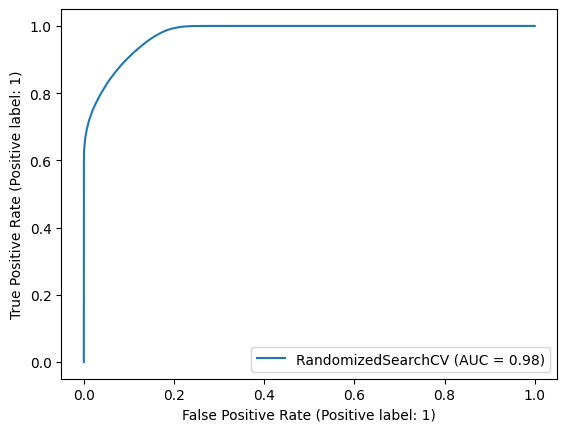

In [21]:
parameters = {'criterion': ['gini','entropy'],'n_estimators': range(50,100,25),'min_samples_split':range(2,6,2)}

#You can define the number of folds for cross-validation as follows:
n_folds = 3

#Using the following code, call the decision tree classifier method:
RF = RandomForestClassifier(random_state=41)

#Use GridSearchCV to implement max_depth as follows:
rf=RandomizedSearchCV(RF,parameters,cv=n_folds,scoring="f1",return_train_score=True)
print("Random Forest Tree on Test Dataset")

rf.fit(X_train,gender_train)
y_pred = rf.predict(X_test)
print("Accuracy:",accuracy_score(y_pred,gender_test))
print("Recall:",recall_score(y_pred,gender_test))
print("Precision:",precision_score(y_pred,gender_test))
print("f1 Score:",f1_score(y_pred,gender_test))
roc_auc_score(gender_test, rf.predict_proba(X_test)[:, 1])
RocCurveDisplay.from_estimator(rf, X_test, gender_test) 
plt.show()
print("Random Forest Tree on Training Dataset")
y_pred = rf.predict(X_train)
print("Accuracy:",accuracy_score(y_pred,gender_train))
print("Recall:",recall_score(y_pred,gender_train))
print("Precision:",precision_score(y_pred,gender_train))
print("f1 Score:",f1_score(y_pred,gender_train))
roc_auc_score(gender_train, rf.predict_proba(X_train)[:, 1])
RocCurveDisplay.from_estimator(rf, X_train, gender_train) 
plt.show()

### Trying boosting alg

Fitting 5 folds for each of 10 candidates, totalling 50 fits
XGBClassifier on Test Dataset


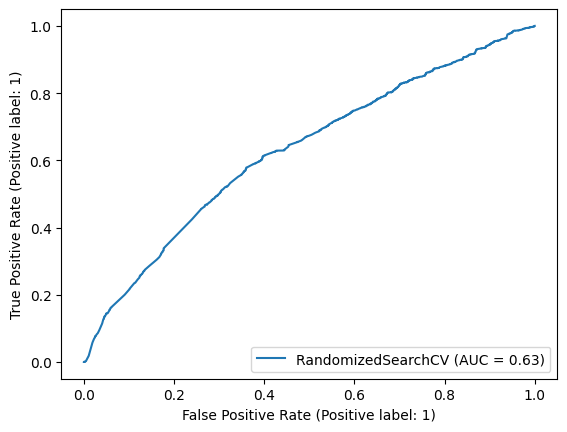

XGBClassifier on Train Dataset


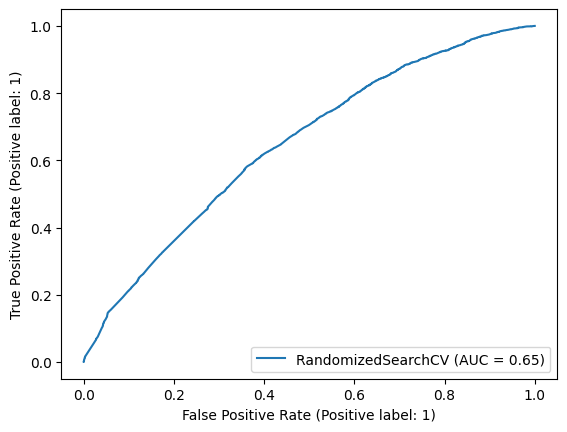

In [22]:
x_cfl=XGBClassifier(verbosity=0)
n_folds = 3
prams={
    'learning_rate':[0.01,0.03,0.05],
     'n_estimators':[100,200],
     'max_depth':[3,5],
    'colsample_bytree':[0.1,0.3,0.5],
    'subsample':[0.1,0.3,0.5]
}

LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
random_cfl=RandomizedSearchCV(x_cfl,prams,verbose=1,n_jobs=-1,return_train_score=True,scoring=LogLoss)
random_cfl.fit(X_train,gender_train)
print("XGBClassifier on Test Dataset")

roc_auc_score(gender_test, random_cfl.predict_proba(X_test)[:, 1])
RocCurveDisplay.from_estimator(random_cfl, X_test, gender_test) 
plt.show()

print("XGBClassifier on Train Dataset")

roc_auc_score(gender_train, random_cfl.predict_proba(X_train)[:, 1])
RocCurveDisplay.from_estimator(random_cfl, X_train, gender_train) 
plt.show()

### Result XGBClassifier  is giving better than other models

### Let try stacking for better perfomance 

In [30]:
clf1 = LogisticRegression()
clf2 = random_cfl.best_estimator_ # just for demo have taken 10 trees 

xgb = XGBClassifier()
stacking_demo = StackingCVClassifier(classifiers=[clf1, clf2], meta_classifier=xgb, use_probas=True, cv=3)

In [31]:
# Do CV
for clf, label in zip([clf1, clf2, stacking_demo], 
                      ['lr', 
                       'Random Forest', 
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X_train, gender_train, cv=3, scoring='roc_auc')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.60 (+/- 0.02) [lr]
Accuracy: 0.60 (+/- 0.02) [Random Forest]
Accuracy: nan (+/- nan) [StackingClassifier]


In [33]:
sclf_fit = stacking_demo.fit(X_train, gender_train)
print("stacking on Test Dataset")

y_pred = sclf_fit.predict(X_test)
print("Accuracy:",accuracy_score(y_pred,gender_test))
print("Recall:",recall_score(y_pred,gender_test))
print("Precision:",precision_score(y_pred,gender_test))
print("f1 Score:",f1_score(y_pred,gender_test))

print("stacking on Train Dataset")

y_pred = sclf_fit.predict(X_train)
print("Accuracy:",accuracy_score(y_pred,gender_train))
print("Recall:",recall_score(y_pred,gender_train))
print("Precision:",precision_score(y_pred,gender_train))
print("f1 Score:",f1_score(y_pred,gender_train))

stacking on Test Dataset
Accuracy: 0.6991708790760164
Recall: 0.5691936161276775
Precision: 0.12954643215600056
f1 Score: 0.21105703718123417
stacking on Train Dataset
Accuracy: 0.7040936339996426
Recall: 0.5165749186322176
Precision: 0.10706195869420386
f1 Score: 0.17736450364565728


In [34]:
import pickle
pickle.dump(sclf_fit, open('model_gender_with_event.pkl', 'wb'))
